In [ ]:
import numpy as np

GLOVE_PATH = "/content/drive/MyDrive/RAVDESS/glove.6B.100d.txt"  # or wherever you saved it
embedding_index = {}

with open(GLOVE_PATH, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

print(f"✅ Loaded {len(embedding_index)} word vectors from GloVe!")


✅ Loaded 400000 word vectors from GloVe!


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading punkt.zip: Package 'punkt.zip' not found in
[nltk_data]     index
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Down

Mounted at /content/drive
✅ Loaded 400000 word vectors from GloVe!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tcn (TCN)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 289ms/step - accuracy: 0.6111 - loss: 0.6875 - val_accuracy: 0.7003 - val_loss: 0.5620
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 286ms/step - accuracy: 0.7142 - loss: 0.5316 - val_accuracy: 0.7571 - val_loss: 0.5010
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 298ms/step - accuracy: 0.7748 - loss: 0.4611 - val_accuracy: 0.7756 - val_loss: 0.4845
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 295ms/step - accuracy: 0.8299 - loss: 0.3807 - val_accuracy: 0.8195 - val_loss: 0.4026
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 286ms/step - accuracy: 0.8827 - loss: 0.2825 - val_accuracy: 0.8470 - val_loss: 0.3759
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 286ms/step - accuracy: 0.9202 - loss: 0.2038 - val_accuracy: 0.8600 - val_loss: 0.3372
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8592 - loss: 0.3369

✅ Test Accuracy: 86.00%
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step

📊 Classification Report:
               precision    recall  f1-score   supp

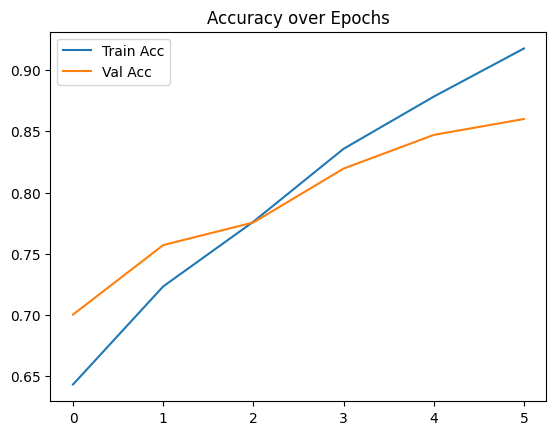

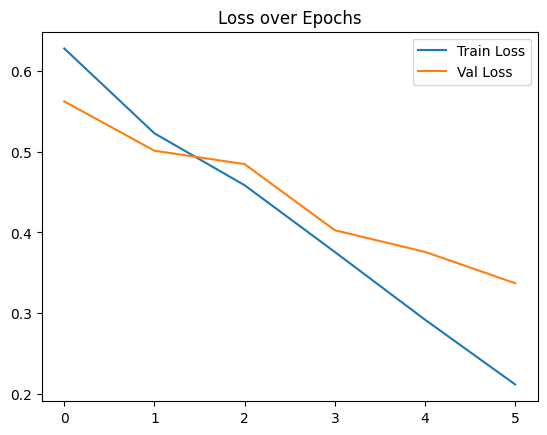

In [1]:
!pip install keras-tcn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import os
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tcn import TCN

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt.zip')
nltk.download('popular')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

from google.colab import drive
drive.mount('/content/drive')

ZIP_PATH = "/content/drive/MyDrive/RAVDESS/archive (10).zip"
EXTRACT_PATH = "/content/RAVDESS"

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

CSV_PATH = os.path.join(EXTRACT_PATH, "Suspicious Communication on Social Platforms.csv")
df = pd.read_csv(CSV_PATH)
df.dropna(inplace=True)

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\S+|[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned'] = df['comments'].apply(preprocess_text)

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['tagging'])

X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['label'], test_size=0.2, random_state=42)

max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

embedding_dim = 100
embedding_index = {}
GLOVE_PATH = "/content/drive/MyDrive/RAVDESS/glove.6B.100d.txt"

with open(GLOVE_PATH, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

print(f"✅ Loaded {len(embedding_index)} word vectors from GloVe!")

word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_len, trainable=False),
    TCN(nb_filters=64, return_sequences=False),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_pad, y_train, epochs=6, batch_size=64, validation_data=(X_test_pad, y_test))

loss, acc = model.evaluate(X_test_pad, y_test)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")

y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


In [2]:
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim,
              weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 210ms/step - accuracy: 0.6415 - loss: 0.6357 - val_accuracy: 0.6968 - val_loss: 0.5565
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.7143 - loss: 0.5276 - val_accuracy: 0.7313 - val_loss: 0.5258
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 210ms/step - accuracy: 0.7383 - loss: 0.4998 - val_accuracy: 0.7451 - val_loss: 0.5049
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 198ms/step - accuracy: 0.7521 - loss: 0.4793 - val_accuracy: 0.7608 - val_loss: 0.4969
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 208ms/step - accuracy: 0.7532 - loss: 0.4641 - val_accuracy: 0.7671 - val_loss: 0.4716
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 199ms/step - accuracy: 0.7748 - loss: 0.4445 - val_accuracy: 0.7738 - val_loss: 0.4633
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7760 - loss: 0.4685

✅ Test Accuracy: 77.38%
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step

📊 Classification Report:
               precision    recall  f1-score   supp

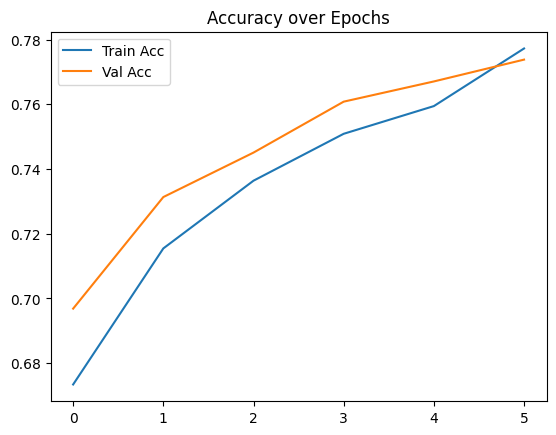

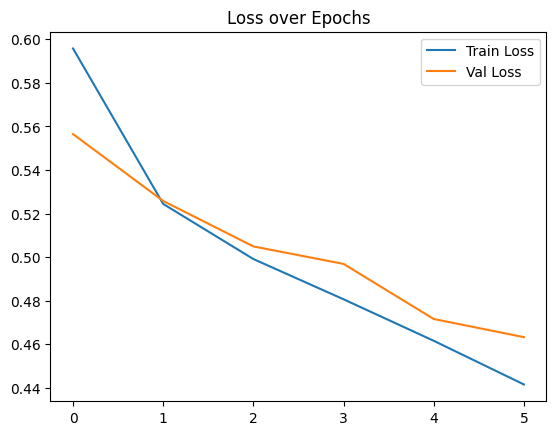

In [4]:
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === MODEL ===
model = Sequential([
    Embedding(
        input_dim=max_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        trainable=False
    ),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# === TRAIN ===
history = model.fit(
    X_train_pad, y_train,
    epochs=6,
    batch_size=64,
    validation_data=(X_test_pad, y_test)
)

# === EVALUATE ===
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")

# === PREDICT ===
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# === PLOT ===
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()
